# Regularization

# K-fold Technique

<font color=blue>**RECAP of topics**

**Tensors** - > If data is in form of images it automatically qualifies as a tensor (which are higher order matrices).

**ANN** -> Simplest neural n/w is Perceptron. There can be n features but there will be only 1 output. Purpose of ANN is broadly into classifcation & regression.

**MLP** -> Multilayer Perceptron (collection of perceptrons). MLP laid foundation for deep neural n/w's i.e. n/w in which there are several layers in b/w. MLP is most basic form for Deep NN. 

**CNN** -> Mainly for images and they can extract features from raw image that is provided to us. After that CNN can do classification. Purpose of CNN is Feature Extraction & then classification.
    
**In terms of libraries-**
- Tensorflow & Keras more flexible in comparison to Scikit learn for architecture of neural networks.
- Scikit learn can be used for other purpose like split data, extracting datasets when dealing with DL.    
- In Keras 2 core data structures - model and layers.



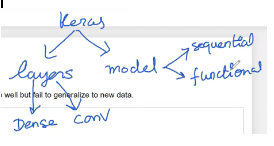

- Regularization methods to improve the performance of neural n/w mainly to avoid overfitting (training results good but not testing results). Overfitting problem is present in any types of neural networks.

- **Weight based techniques** In L2 regularization (ridge) the weights decay but r not exactly 0 so we do not have problem of sparcity. In L1 (lasso) some weights are exactly 0 so problem of sparcity, lot of information may be lost in that. Dropout ignores some % of neurons from layers based on architecture defined.

- **Data based techniques** Data Aumentation technique particularly for images. K-fold technique will give estimate of model performance by training as well as evaluating it on k-folds of data instead of single train-test split. Can be used on images, text or tabular data.

- **Early Stopping Execution based** Can we stop the continuation of neural n/w process earlier than we epochs we have specified. Case when we get better solution in lesser no.of epochs or no improvement in values of loss function although epochs increasing.

## <font color=blue>CNN

### <font color=blue>Stacking of convolution layers, increasing depth due to many filters and feature maps in convolution layers is responsible for hierarchical learning of features (lower-level features like edges to higher level features like nose, eyes) even though spacial size of image (width*height) is decreasing by adding convolution layers.

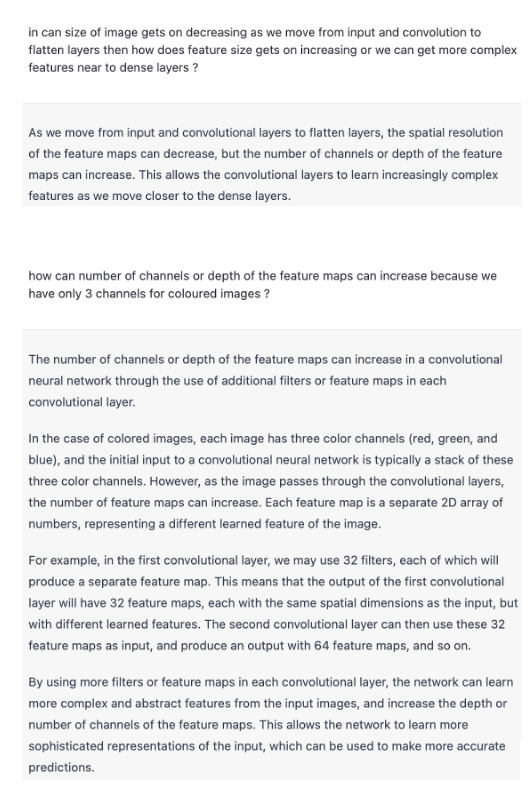

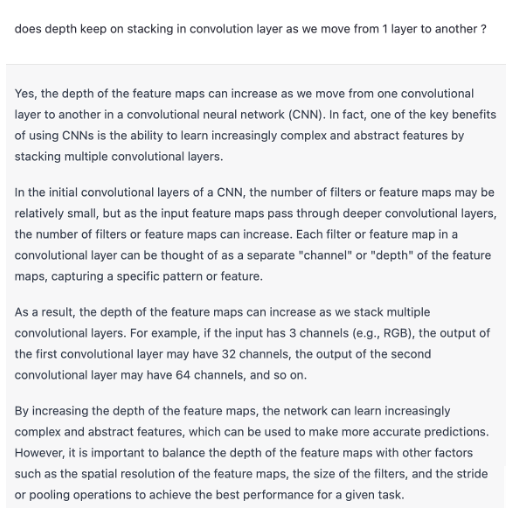

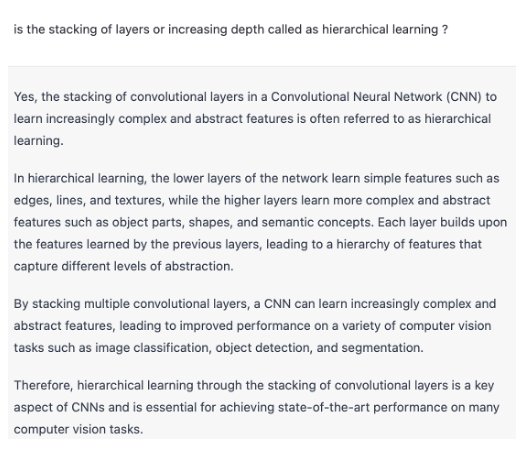

## Dataset

- cifar10 is an image dataset. 10 in cifar10 implies there are 10 classes in this dataset. This has images of different objects & things.
- Like mnist fashion dataset is a common dataset for black & white images similarly cifar10 is a common dataset for colored images.

### Some Good benchmark datasets to test your neural network model


<font color=blue>
    
- MNIST (digits)   

- Fashion MNIST (apparels)  

- Iris   
- CIFAR   
</font>

- Out of these MNIST (digits) and Fashion MNIST (apparels) are black and white.
- Iris is colored images as well as available in tabular form.
- CIFAR is colored images dataset.

## Model

- We will use simple Sequential model for it & since it is an image dataset we will use CNN.
- For CNN we need Conv2D, MaxPooling2D and for later part of CNN we have Dense, Flatten layer.
- We use Adam for optimizer.
- sparse_categorical_crossentropy is used when target is label encoded. categorical_crossentropy is used when target is one hot encoded. 
- It is good to know the types of loss functions we use cz these things also help to reach us to solution.

## K-fold validation - Works on Data

- In K-fold from same dataset we keep on taking different training and testing datasets.
- This again gives n/w different information every time & it is able to learn better.

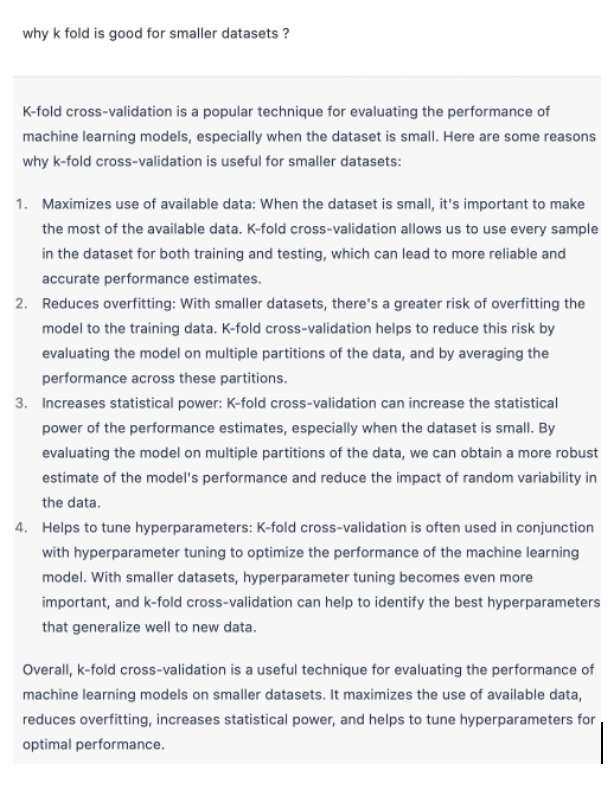

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

### Model configuration

In [2]:
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 25
optimizer = Adam()
verbosity = 1
num_folds = 5

### Load CIFAR-10 data

In [3]:
(input_train, target_train), (input_test, target_test) = cifar10.load_data()


In [4]:
len(input_train), len(target_train)

(50000, 50000)

In [5]:
np.unique(target_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
len(input_test), len(target_test)

(10000, 10000)

In [7]:
input_train[0:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Determine shape of the data

In [8]:
input_shape = (img_width, img_height, img_num_channels)
input_shape

(32, 32, 3)

### Parse numbers as floats

In [9]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

### Normalize data

In [10]:
input_train = input_train / 255
input_test = input_test / 255

input_train[0:1]

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

### Define per-fold score containers

- Since we are diving into K folds we will have be having multiple set of accuracies and multiple set of loss rates
- We will find the accuracy as well as loss in each fold & then take an average of accuracies and loss.

In [11]:
acc_per_fold = []
loss_per_fold = []

### Merge train and test inputs as well as targets

Here instead of splitting training data into train and validation and keeping test as seperate holdout for final evaluation, we are not splitting training data into validation but merging test data itself to train data so that the data is tested k-fold times instead of 1 time as done traditionally in single train-test split.

In [12]:
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# axis=0 means we r moving along rows and axis=1 means we r moving along columns

### Define the K-fold Cross Validator

In [13]:
# This kfold technique can be applied to any of ML algortihm

kfold = KFold(n_splits=num_folds, shuffle=True)

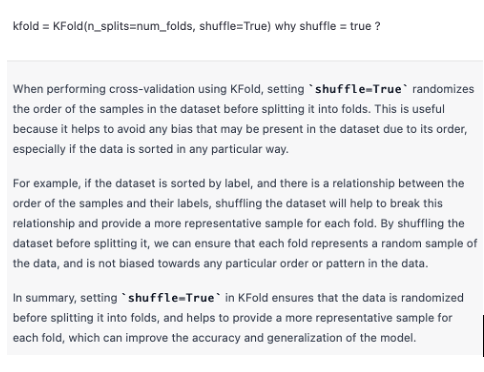

### K-fold Cross Validation model evaluation

In [14]:
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1



2023-04-01 21:06:00.640842: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
960/960 [==============================] - 15s 16ms/step - loss: 1.4578 - accuracy: 0.4722
Epoch 2/25
960/960 [==============================] - 15s 16ms/step - loss: 1.0661 - accuracy: 0.6227
Epoch 3/25
960/960 [==============================] - 15s 15ms/step - loss: 0.9006 - accuracy: 0.6848
Epoch 4/25
960/960 [==============================] - 15s 16ms/step - loss: 0.7700 - accuracy: 0.7297
Epoch 5/25
960/960 [==============================] - 15s 15ms/step - loss: 0.6605 - accuracy: 0.7676
Epoch 6/25
960/960 [==============================] - 15s 15ms/step - loss: 0.5677 - accuracy: 0.8013
Epoch 7/25
960/960 [==============================] - 15s 15ms/step - loss: 0.4747 - accuracy: 0.8346
Epoch 8/25
960/960 [==============================] - 15s 15ms/step - loss: 0.3924 - accuracy: 0.8611
Epoch 9/25
960/960 [==============================] - 15s 15ms/step - loss: 0.3207 - ac

Epoch 1/25
960/960 [==============================] - 15s 15ms/step - loss: 1.5107 - accuracy: 0.4463
Epoch 2/25
960/960 [==============================] - 14s 15ms/step - loss: 1.1803 - accuracy: 0.5795
Epoch 3/25
960/960 [==============================] - 14s 15ms/step - loss: 1.0414 - accuracy: 0.6311
Epoch 4/25
960/960 [==============================] - 14s 15ms/step - loss: 0.9524 - accuracy: 0.6648
Epoch 5/25
960/960 [==============================] - 14s 15ms/step - loss: 0.8736 - accuracy: 0.6908
Epoch 6/25
960/960 [==============================] - 15s 15ms/step - loss: 0.8133 - accuracy: 0.7137
Epoch 7/25
960/960 [==============================] - 14s 15ms/step - loss: 0.7544 - accuracy: 0.7343
Epoch 8/25
960/960 [==============================] - 14s 15ms/step - loss: 0.7052 - accuracy: 0.7540
Epoch 9/25
960/960 [==============================] - 14s 15ms/step - loss: 0.6526 - accuracy: 0.7704
Epoch 10/25
960/960 [==============================] - 14s 15ms/step - loss: 0.607

In [15]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 2.568981170654297 - Accuracy: 67.03333258628845%
------------------------------------------------------------------------
> Fold 2 - Loss: 2.2605206966400146 - Accuracy: 66.17500185966492%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.579857349395752 - Accuracy: 60.06666421890259%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.1460795402526855 - Accuracy: 64.45833444595337%
------------------------------------------------------------------------
> Fold 5 - Loss: 1.579830527305603 - Accuracy: 64.60000276565552%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 64.46666717529297 (+- 2.4034996382819984)
> Loss: 2.2270538568496705
-------------------------------